<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

# ANDI challenge 2020

In [1]:
#|output: asis
#| echo: false
show_doc(challenge_2020_dataset)

C:\Users\Gorka\Anaconda3\envs\andi_dataset\lib\site-packages\fastcore\docscrape.py:225: UserWarning: potentially wrong underline length... 
Outputs 
-------- in 
Creates a dataset similar to the one given by in the ANDI challenge. 
Check the webpage of the challenge for more details. The default values...
  else: warn(msg)
C:\Users\Gorka\Anaconda3\envs\andi_dataset\lib\site-packages\fastcore\docscrape.py:225: UserWarning: Unknown section Inputs
  else: warn(msg)
C:\Users\Gorka\Anaconda3\envs\andi_dataset\lib\site-packages\fastcore\docscrape.py:225: UserWarning: Unknown section Outputs
  else: warn(msg)
C:\Users\Gorka\Anaconda3\envs\andi_dataset\lib\site-packages\fastcore\docscrape.py:225: UserWarning: Unknown section Notes
  else: warn(msg)


---

### challenge_2020_dataset

>      challenge_2020_dataset (N:numpy.ndarray|int=1000, max_T:int=1000,
>                              min_T:int=10, tasks:list|int=[1, 2, 3],
>                              dimensions:list|int=[1, 2, 3],
>                              load_dataset:{'False','True'}=False,
>                              save_dataset:{'False','True'}=False,
>                              path_datasets:str='',
>                              load_labels:{'False','True'}=True,
>                              load_trajectories:{'False','True'}=False,
>                              save_trajectories:{'False','True'}=False,
>                              path_trajectories:str='datasets/',
>                              N_save:int=1000, t_save:int=1000,
>                              return_noise:{'False','True'}=False)

Creates a dataset similar to the one given by in the ANDI challenge. 
Check the webpage of the challenge for more details. The default values
are similar to the ones used to generate the available dataset.

The function returns 6 variables, three variables for the trajectories and three 
for the corresponding labels. Each variable is a list of three lists. Each of the
three lists corresponds to a given dimension, in ascending order. If one of the
tasks/dimensions was not calculated, the given list will be empty. 

See the tutorials in our Github repository to learn about this function.

# ANDI challenge 2022

In [2]:
#|output: asis
#| echo: false
show_doc(challenge_2022_dataset)

C:\Users\Gorka\Anaconda3\envs\andi_dataset\lib\site-packages\fastcore\docscrape.py:225: UserWarning: potentially wrong underline length... 
Notes 
------- in 
Creates a datasets with same structure as ones given in the ANDI 2022 challenge. Default values for the
various diffusion models have been set such as to be in the same ranges as the ones expected for the...
  else: warn(msg)
C:\Users\Gorka\Anaconda3\envs\andi_dataset\lib\site-packages\fastcore\docscrape.py:225: UserWarning: potentially wrong underline length... 
Inputs 
----- in 
Creates a datasets with same structure as ones given in the ANDI 2022 challenge. Default values for the
various diffusion models have been set such as to be in the same ranges as the ones expected for the...
  else: warn(msg)
C:\Users\Gorka\Anaconda3\envs\andi_dataset\lib\site-packages\fastcore\docscrape.py:225: UserWarning: potentially wrong underline length... 
Video Inputs 
---------- in 
Creates a datasets with same structure as ones given in the AN

---

### challenge_2022_dataset

>      challenge_2022_dataset (experiments=5, dics=None, repeat_exp=True,
>                              num_fovs=20, return_timestep_labs=False,
>                              save_data=False, path='data/', prefix='',
>                              get_video=False, num_vip=None,
>                              get_video_masks=False)

Creates a datasets with same structure as ones given in the ANDI 2022 challenge. Default values for the
various diffusion models have been set such as to be in the same ranges as the ones expected for the
challenge. For details, check the ANDI 2022 challenge webpage.

This function generates trajectory datasets like the ones considered in the ANDI 2022 Challenge. It is based in `models_phenom.create_dataset` but also applies:

- Apply Field of View (FOV).
- Add localization noise.
- Smooth the labeling of trajectories to a minimum segment length of 5.
- Extracts ensemble properties.
- Generate videos, if asked.
    
**Outputs:** 

- `trajs_out`: List of lenght (experiments x num_fovs). Each elements are is dataframe containing the trajectories of a particular experiment/fov, in order of generation (i.e. [exp1_fov1, exp1_fov2, ..., exp2_fov1 ....]). If `return_timestep_labs = True`, the dataframes also contain the labels at each time step.    

- `trajs_out`: if `get_video = True`, returns the video for each experiments / FOV.

- `labels_traj_out` : List of same length of trajs_out containing the labels of the corresponding trajectories. Each element contains a list with the labels of each trajectory, following the scheme: [idx_traj, D_1, alpha_1, state_1, CP_1, D_2, alpha_2, .... state_N]

- `labels_ens_out` : List of same length of trajs_out containing the ensemble labels of given experiment. See description of output matrix in `utils_challenge._extract_ensemble()`.

## Test

### Distributions parameters

In [ ]:
num_experiments, num_fovs = 5, 1

dics = []
for i in range(num_experiments):    
    dic = _get_dic_andi2(i+1)    
    dics.append(dic)
    
df_list, _, _ = challenge_2022_dataset(experiments = num_experiments, 
                                       num_fovs = num_fovs, 
                                       dics = dics,
                                       return_timestep_labs = True
                                              )

  0%|          | 0/5 [00:00<?, ?it/s]

''

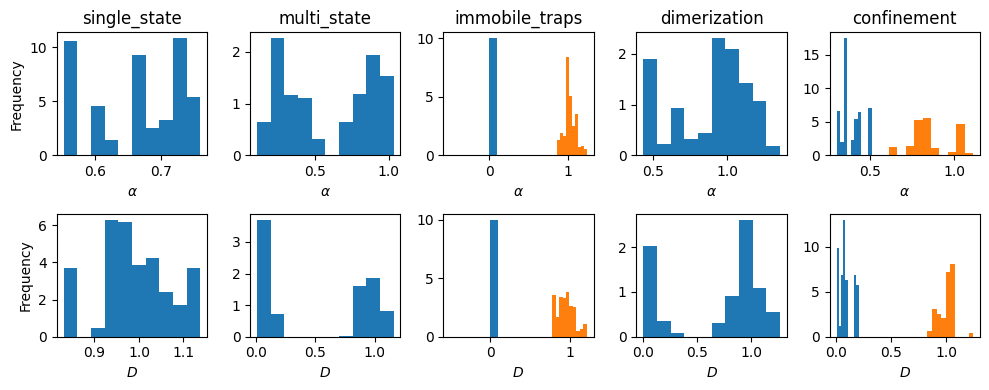

In [ ]:
fig, axs = plt.subplots(2, len(df_list), figsize = (len(df_list)*2, 2*2), tight_layout = True)

for df, ax, dic in zip(df_list, axs.transpose(), dics):
    alphas = df['alpha']
    Ds = df['D']
    states = df['state']
    for u in np.unique(states):
        ax[0].hist(alphas[states == u], density = 1)
        ax[1].hist(Ds[states == u], density = 1)
    
    ax[0].set_title(dic['model'])
plt.setp(axs[:,0], ylabel = 'Frequency')
plt.setp(axs[0,:], xlabel = r'$\alpha$')
plt.setp(axs[1,:], xlabel = r'$D$')
;

### FOVs

In [ ]:
num_fovs = 3
df_fov, _ , lab_e = challenge_2022_dataset(experiments = [1,2,3,4,5],
                                           num_fovs =num_fovs, 
                                           return_timestep_labs = True
                                           )

  0%|          | 0/5 [00:00<?, ?it/s]